# Project 1: SAT & ACT Analysis


## Problem Statement

<span style="color:blue">
    
The College Board has created a new more simplified version of the SAT as of 2016 and wants to increase participation across the Country.
    
The team I am working with has been asked to look into a way to increase participation nationwide and in particular look at the model of certain states like Colorado, Rhode Island, and Illinois. These state recently went up to 100% participation and could be a model for other states that have low participation.

# Executive Summary


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [2019 Data Import and Cleaning](#2019-Data-Import-and-Cleaning)
 - [Combine your 2017, 2018, and 2019 data into a single dataframe](#Combine-your-2017,-2018,-and-2019-data-into-a-single-dataframe)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
 - [Investigate trends in the data](#Investigate-trends-in-the-data)
- [Data Visualization](#Visualize-the-data)
 - [Plot and interpret histograms](#Plot-and-interpret-histograms)
 - [Plot and interpret scatter plots](#Plot-and-interpret-scatter-plots)
 - [Plot and interpret boxplots](#Plot-and-interpret-boxplots)
 - [Additional Plots](#Additional-Plots)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [What Next](#What-Next)


<span style="color:blue">
    
Things to look into in this report.
- What do the participation rates look like over the years for 2017 - 2019 for the SAT and ACT.
- What do the test scores look like over the years for 2017 - 2019 for the SAT and ACT.
- Do the participation rates and scores have any correlation and what can be learned from that?
- How can this information be used when trying to get a state to increse SAT participation?
- What states might be best to target for incresing participation?


**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat2017 = pd.read_csv('./../data/sat_2017.csv')
act2017 = pd.read_csv('./../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat2017.head(10)


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act2017.head(10)            

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat2017.shape

(51, 5)

#### 3. Verbally Describe Data



<span style="color:blue">


The two data sets both show the sat and act scores of each state and the District of Columbia so 51 rows. The data is divided by participation of the state then the average of the scores from each different test category and the average of the overall score.  These are set out as state in each row and the different values in the columns.

#### 4a. Does the data look complete? 

<span style="color:blue">

The data seems complete I see 51 rows one for each state and the District of Columbia and no column has any empty spots

#### 4b. Are there any obvious issues with the observations?



<span style="color:blue">

Issue on the composite line 52 of Wyoming it says 20.2x.  There is also a possible issue with the Maryland math score for SAT 2017, it is below the possible of 200 minimum. It is supposed to be 524. The Maryland science score for ACT 2017 was also wrong at 2.3 though the original data said 23.2.
the sat scores range from 200 to 800 for each subject and 400 to 1600 total
The act scores range fom 1 to 36 on all and average that for the composite

#### 4c. Fix any errors you identified


In [6]:
act2017.at[51, 'Composite'] = 20.2
sat2017.at[20, 'Math'] = 524
act2017.at[21, 'Science'] = 23.2
# fixing errors in code

#### 5. What are your data types? 


In [7]:
sat2017.dtypes
#checking types

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [8]:
act2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

<span style="color:blue">

The participation percent on both tests is an object along with the composite of the act2017

#### 6. Fix Incorrect Data Types


In [9]:
#changing percent to a number to use instead of an object
def convert_percent(val):
    new_val = val.replace('%', '')
    return float(new_val)

# code used from  https://pbpython.com/pandas_dtypes.html 

In [10]:
sat2017['Participation'] = sat2017['Participation'].apply(convert_percent)

In [11]:
act2017['Participation'] = act2017['Participation'].apply(convert_percent)

In [12]:
act2017['Composite'] = pd.to_numeric(act2017['Composite'])

In [13]:
sat2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [14]:
act2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns


In [15]:
# renaming the columns
sat2017.rename(columns={'State' : 'state',
                        'Participation':'sat17_participation',
                        'Evidence-Based Reading and Writing': 'sat17_writing',
                       'Math': 'sat17_math',
                       'Total': 'sat17_total'}, inplace=True)

In [16]:
act2017.rename(columns={'State' : 'state',
                        'Participation':'act17_participation',
                        'English': 'act17_english',
                       'Math': 'act17_math',
                       'Reading': 'act17_reading',
                       'Science': 'act17_science',
                       'Composite': 'act17_composite'}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object|ACT/SAT|The state that each piece of data is about|
|sat17_participation|float|SAT|Mean participation in the SAT exam by students in the year 2017|
|sat17_writing|int|SAT|Mean state score in evidenced-based reading and writing on the SAT in the year 2017|
|sat17_math|int|SAT|Mean state score in math on the SAT in the year 2017|
|sat17_total|int|SAT|Mean state score using the sum of the writing and math scores on the SAT in the year 2017|
|act17_participation|float|ACT|Mean participation in the SAT exam by students in the year 2017|
|act17_english|float|ACT|Mean state score in english on the ACT in 2017|
|act17_math|float|ACT|Mean state score in math on the ACT in 2017|
|act17_reading|float|ACT|Mean state score in reading on the ACT in 2017|
|act17_science|float|ACT|Mean state score in science on the ACT in 2017|
|act17_composite|float|ACT|Mean state score using the average of all the categories on the ACT in the year 2017|
|sat18_participation|float|SAT|Mean participation in the SAT exam by students in the year 2018|
|sat18_writing|int|SAT|Mean state score in evidenced-based reading and writing on the SAT in the year 2018|
|sat18_math|int|SAT|Mean state score in math on the SAT in the year 2018|
|sat18_total|int|SAT|Mean state score using the sum of the writing and math scores on the SAT in the year 2018|
|act18_participation|float|ACT|Mean participation in the SAT exam by students in the year 2018|
|act18_composite|float|ACT|Mean state score using the average of all the categories on the ACT in the year 2018|
|sat19_participation|float|SAT|Mean participation in the SAT exam by students in the year 2019|
|sat19_writing|int|SAT|Mean state score in evidenced-based reading and writing on the SAT in the year 2019|
|sat19_math|int|SAT|Mean state score in math on the SAT in the year 2019|
|sat19_total|int|SAT|Mean state score using the sum of the writing and math scores on the SAT in the year 2019|
|act19_participation|float|ACT|Mean participation in the SAT exam by students in the year 2019|
|act19_composite|float|ACT|Mean state score using the average of all the categories on the ACT in the year 2019|


#### 9. Drop unnecessary rows



In [17]:
#removing the extra row
act2017.drop(0, axis=0, inplace=True)

# code help https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/#:~:text=To%20delete%20rows%20based%20on,the%20axis%20set%20to%200.

In [18]:
act2017.shape

(51, 7)

In [19]:
act2017.reset_index(drop = True, inplace=True)

#### 10. Merge Dataframes



In [20]:
# merging the frames
combined_2017 = pd.merge(sat2017, act2017, on='state', how='outer')

#code help https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

#### 11. Save your cleaned, merged dataframe



In [21]:
combined_2017.to_csv('./../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

In [22]:
# Running same series of code and checks for 2018 as 2017
sat2018 = pd.read_csv('./../data/sat_2018.csv')
act2018 = pd.read_csv('./../data/act_2018.csv')

In [23]:
sat2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [24]:
act2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [25]:
sat2018['Participation'] = sat2018['Participation'].apply(convert_percent)

In [26]:
act2018['Participation'] = act2018['Participation'].apply(convert_percent)

In [27]:
sat2018.rename(columns={'State' : 'state',
                        'Participation':'sat18_participation',
                        'Evidence-Based Reading and Writing': 'sat18_writing',
                       'Math': 'sat18_math',
                       'Total': 'sat18_total'}, inplace=True)

In [28]:
act2018.rename(columns={'State' : 'state',
                        'Participation':'act18_participation',
                       'Composite': 'act18_composite'}, inplace=True)

In [29]:
act2018.at[8, 'state'] = 'District of Columbia'

In [30]:
act2018.drop(19, axis=0, inplace=True)

In [31]:
act2018.reset_index(drop = True, inplace=True)

In [32]:
combined_2018 = pd.merge(sat2018, act2018, on='state', how='outer')

In [33]:
combined_2018.head()

,state,sat18_participation,sat18_writing,sat18_math,sat18_total,act18_participation,act18_composite
0,Alabama,6.0,595,571,1166,100.0,19.1
1,Alaska,43.0,562,544,1106,33.0,20.8
2,Arizona,29.0,577,572,1149,66.0,19.2
3,Arkansas,5.0,592,576,1169,100.0,19.4
4,California,60.0,540,536,1076,27.0,22.7


In [34]:
combined_2018.to_csv('./../data/combined_2018.csv', index=False)

## 2019 Data Import and Cleaning

In [35]:
# running the code for 2019
sat2019 = pd.read_csv('./../data/sat_2019.csv')
act2019 = pd.read_csv('./../data/act_2019.csv')

In [36]:
sat2019.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [37]:
act2019.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [38]:
sat2019['Participation Rate'] = sat2019['Participation Rate'].apply(convert_percent)

In [39]:
act2019['Participation'] = act2019['Participation'].apply(convert_percent)

In [40]:
sat2019.rename(columns={'State' : 'state',
                        'Participation Rate':'sat19_participation',
                        'EBRW': 'sat19_writing',
                       'Math': 'sat19_math',
                       'Total': 'sat19_total'}, inplace=True)

In [41]:
act2019.rename(columns={'State' : 'state',
                        'Participation':'act19_participation',
                       'Composite': 'act19_composite'}, inplace=True)

In [42]:
sat2019.drop(39, axis=0, inplace=True)
sat2019.drop(47, axis=0, inplace=True)
act2019.drop(51, axis=0, inplace=True)

In [43]:
sat2019.reset_index(drop = True, inplace=True)
act2019.reset_index(drop = True, inplace=True)

In [44]:
combined_2019 = pd.merge(sat2019, act2019, on='state', how='outer')

In [45]:
combined_2019.head()

,state,sat19_participation,sat19_writing,sat19_math,sat19_total,act19_participation,act19_composite
0,Alabama,7.0,583,560,1143,100.0,18.9
1,Alaska,41.0,556,541,1097,38.0,20.1
2,Arizona,31.0,569,565,1134,73.0,19.0
3,Arkansas,6.0,582,559,1141,100.0,19.3
4,California,63.0,534,531,1065,23.0,22.6


In [46]:
combined_2019.to_csv('./../data/combined_2019.csv', index=False)

#### Combine your 2017, 2018, and 2019 data into a single dataframe


In [47]:
combined_201718 = pd.merge(combined_2017, combined_2018, on='state', how='outer')

In [48]:
final_data = pd.merge(combined_201718, combined_2019, on='state', how='outer')

In [49]:
final_data.head()

,state,sat17_participation,sat17_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,...,sat18_math,sat18_total,act18_participation,act18_composite,sat19_participation,sat19_writing,sat19_math,sat19_total,act19_participation,act19_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,571,1166,100.0,19.1,7.0,583,560,1143,100.0,18.9
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,544,1106,33.0,20.8,41.0,556,541,1097,38.0,20.1
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,572,1149,66.0,19.2,31.0,569,565,1134,73.0,19.0
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,576,1169,100.0,19.4,6.0,582,559,1141,100.0,19.3
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,536,1076,27.0,22.7,63.0,534,531,1065,23.0,22.6


In [50]:
final_data.to_csv('./../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [51]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$



In [52]:
# calculate standard deviantion

def stnd_dev(column):
    mean_val = np.mean(column)
    
    value = 0
    for i in column:
        value += ((i - mean_val) ** 2)
        
    standard_dev = (value / len(column)) ** 0.5 
    return standard_dev

In [53]:
stnd_dev(final_data['sat17_participation'])

34.92907076664508

In [54]:
np.std(final_data['sat17_participation'])


34.92907076664508

In [55]:
np.std(final_data['sat17_writing'])

45.21697020437866

In [56]:
# creating a dictionary of the standard deviations from the function
{x.name:stnd_dev(x) for x in [final_data[i] for i in final_data.columns if (final_data[i].dtype=='float64') or (final_data[i].dtype=='int64')]}

# code help https://stackoverflow.com/questions/55048445/dictionary-comprehension-to-apply-a-function-to-dataframe-columns


{'sat17_participation': 34.92907076664508,
 'sat17_writing': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act17_participation': 31.824175751231806,
 'act17_english': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_science': 1.7222161451443676,
 'act17_composite': 2.000786081581989,
 'sat18_participation': 36.946619223539415,
 'sat18_writing': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'sat18_total': 93.22742384464433,
 'act18_participation': 33.70173582041031,
 'act18_composite': 2.090779082141178,
 'sat19_participation': 38.365840486857266,
 'sat19_writing': 45.792378682545134,
 'sat19_math': 50.78521461840036,
 'sat19_total': 96.24027185617864,
 'act19_participation': 34.17582373703048,
 'act19_composite': 2.172901153595978}

<span style="color:blue">

The numbers I am getting are not exactly the same as the pandas describe but they do line up with numpy's std method.
I wonder if this is an issue with rounding numbers during the operation. If pandas rounds at times it could change the end result by a small amount.

#### Investigate trends in the data


In [57]:
final = final_data.set_index('state')
#setting a state index for readability in sorting

In [58]:
final['sat17_participation'].sort_values(ascending=False).head()

state
Connecticut             100.0
Delaware                100.0
District of Columbia    100.0
Michigan                100.0
New Hampshire            96.0
Name: sat17_participation, dtype: float64

In [59]:
final['sat17_participation'].sort_values(ascending=False).tail()

state
Utah            3.0
Missouri        3.0
Iowa            2.0
Mississippi     2.0
North Dakota    2.0
Name: sat17_participation, dtype: float64

In [60]:
final['sat18_participation'].sort_values(ascending=False).head()

state
Idaho          100.0
Michigan       100.0
Delaware       100.0
Connecticut    100.0
Colorado       100.0
Name: sat18_participation, dtype: float64

In [61]:
final['sat18_participation'].sort_values(ascending=False).tail()

state
Wisconsin       3.0
Nebraska        3.0
South Dakota    3.0
Wyoming         3.0
North Dakota    2.0
Name: sat18_participation, dtype: float64

In [62]:
final['sat19_participation'].sort_values(ascending=False).head()

state
Idaho          100.0
Illinois       100.0
Michigan       100.0
Delaware       100.0
Connecticut    100.0
Name: sat19_participation, dtype: float64

In [63]:
final['sat19_participation'].sort_values(ascending=False).tail()

state
Wisconsin       3.0
Nebraska        3.0
South Dakota    3.0
Wyoming         3.0
North Dakota    2.0
Name: sat19_participation, dtype: float64

In [64]:
final['act17_participation'].sort_values(ascending=False).head()

state
Wyoming     100.0
Oklahoma    100.0
Arkansas    100.0
Colorado    100.0
Kentucky    100.0
Name: act17_participation, dtype: float64

In [65]:
final['act17_participation'].sort_values(ascending=False).tail()

state
Pennsylvania     23.0
Rhode Island     21.0
Delaware         18.0
New Hampshire    18.0
Maine             8.0
Name: act17_participation, dtype: float64

In [66]:
final['act18_participation'].sort_values(ascending=False).head()

state
Wyoming      100.0
Oklahoma     100.0
Arkansas     100.0
Kentucky     100.0
Louisiana    100.0
Name: act18_participation, dtype: float64

In [67]:
final['act18_participation'].sort_values(ascending=False).tail()

state
Pennsylvania     20.0
Delaware         17.0
New Hampshire    16.0
Rhode Island     15.0
Maine             7.0
Name: act18_participation, dtype: float64

In [68]:
final['act19_participation'].sort_values(ascending=False).head()

state
Wyoming      100.0
Oklahoma     100.0
Arkansas     100.0
Kentucky     100.0
Louisiana    100.0
Name: act19_participation, dtype: float64

In [69]:
final['act19_participation'].sort_values(ascending=False).tail()

state
Pennsylvania     17.0
New Hampshire    14.0
Delaware         13.0
Rhode Island     12.0
Maine             6.0
Name: act19_participation, dtype: float64

<span style="color:blue">

The participation numbers can be interesting it seems like the ACT has better overall participation but the SAT has a growing number of states that are going up to 100%.  States like Colorado for example went from low participation to 100%

In [70]:
final['sat17_total'].sort_values(ascending=False).head()

state
Minnesota    1295
Wisconsin    1291
Iowa         1275
Missouri     1271
Kansas       1260
Name: sat17_total, dtype: int64

In [71]:
final['sat17_total'].sort_values(ascending=False).tail()

state
Maine                   1012
Michigan                1005
Idaho                   1005
Delaware                 996
District of Columbia     950
Name: sat17_total, dtype: int64

In [72]:
final['sat18_total'].sort_values(ascending=False).head()

state
Minnesota       1298
Wisconsin       1294
North Dakota    1283
Iowa            1265
Kansas          1265
Name: sat18_total, dtype: int64

In [73]:
final['sat18_total'].sort_values(ascending=False).tail()

state
Utah                    1010
Idaho                   1001
West Virginia            999
Delaware                 998
District of Columbia     977
Name: sat18_total, dtype: int64

In [74]:
final['sat19_total'].sort_values(ascending=False).head()

state
Minnesota       1284
Wisconsin       1283
South Dakota    1268
North Dakota    1263
Nebraska        1260
Name: sat19_total, dtype: int64

In [75]:
final['sat19_total'].sort_values(ascending=False).tail()

state
Idaho                   993
Delaware                985
District of Columbia    975
Oklahoma                963
West Virginia           943
Name: sat19_total, dtype: int64

In [76]:
final['act17_composite'].sort_values(ascending=False).head()

state
New Hampshire           25.5
Massachusetts           25.4
Connecticut             25.2
Maine                   24.3
District of Columbia    24.2
Name: act17_composite, dtype: float64

In [77]:
final['act17_composite'].sort_values(ascending=False).tail()

state
North Carolina    19.1
Hawaii            19.0
South Carolina    18.7
Mississippi       18.6
Nevada            17.8
Name: act17_composite, dtype: float64

In [78]:
final['act18_composite'].sort_values(ascending=False).head()

state
Connecticut      25.6
Massachusetts    25.5
New Hampshire    25.1
New York         24.5
Michigan         24.2
Name: act18_composite, dtype: float64

In [79]:
final['act18_composite'].sort_values(ascending=False).tail()

state
Alabama           19.1
Hawaii            18.9
Mississippi       18.6
South Carolina    18.3
Nevada            17.7
Name: act18_composite, dtype: float64

In [80]:
final['act19_composite'].sort_values(ascending=False).head()

state
Massachusetts    25.5
Connecticut      25.5
New Hampshire    25.0
Rhode Island     24.7
New York         24.5
Name: act19_composite, dtype: float64

In [81]:
final['act19_composite'].sort_values(ascending=False).tail()

state
Alabama           18.9
Louisiana         18.8
South Carolina    18.8
Mississippi       18.4
Nevada            17.9
Name: act19_composite, dtype: float64

<span style="color:blue">
    
It is interesting that the SAT scores for some of the top states are also those that have a low participation rate.
This also seems to be true for the ACT scores.   

In [82]:
final[(final['sat17_participation'] > 50) & (final['act17_participation'] > 50)]

,sat17_participation,sat17_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,...,sat18_math,sat18_total,act18_participation,act18_composite,sat19_participation,sat19_writing,sat19_math,sat19_total,act19_participation,act19_composite
state,,,,,,,,,,,,,,,,,,,,,
Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,...,549,1099,66.0,19.9,100.0,516,483,999,54.0,20.1
Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,21.4,...,522,1064,53.0,21.4,71.0,538,519,1058,49.0,21.4
Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,...,530,1010,89.0,18.9,54.0,550,550,1100,80.0,19.0


In [83]:
final[(final['sat18_participation'] > 50) & (final['act18_participation'] > 50)]

,sat17_participation,sat17_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,...,sat18_math,sat18_total,act18_participation,act18_composite,sat19_participation,sat19_writing,sat19_math,sat19_total,act19_participation,act19_composite
state,,,,,,,,,,,,,,,,,,,,,
Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,...,549,1099,66.0,19.9,100.0,516,483,999,54.0,20.1
Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,21.4,...,522,1064,53.0,21.4,71.0,538,519,1058,49.0,21.4
Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,...,530,1010,89.0,18.9,54.0,550,550,1100,80.0,19.0
North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,19.1,...,543,1098,100.0,19.1,51.0,554,546,1100,100.0,19.0
South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,...,523,1070,100.0,18.3,68.0,526,504,1030,78.0,18.8


In [84]:
final[(final['sat19_participation'] > 50) & (final['act19_participation'] > 50)]

,sat17_participation,sat17_writing,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,...,sat18_math,sat18_total,act18_participation,act18_composite,sat19_participation,sat19_writing,sat19_math,sat19_total,act19_participation,act19_composite
state,,,,,,,,,,,,,,,,,,,,,
Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,...,549,1099,66.0,19.9,100.0,516,483,999,54.0,20.1
Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0,...,530,1010,89.0,18.9,54.0,550,550,1100,80.0,19.0
North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,19.1,...,543,1098,100.0,19.1,51.0,554,546,1100,100.0,19.0
South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,...,523,1070,100.0,18.3,68.0,526,504,1030,78.0,18.8


<span style="color:blue">
    
This last set makes North and South Carolina interesting as they already had 100% ACT participation, except South Carolin in 2019, but the SAT increases.  

## Visualize the data



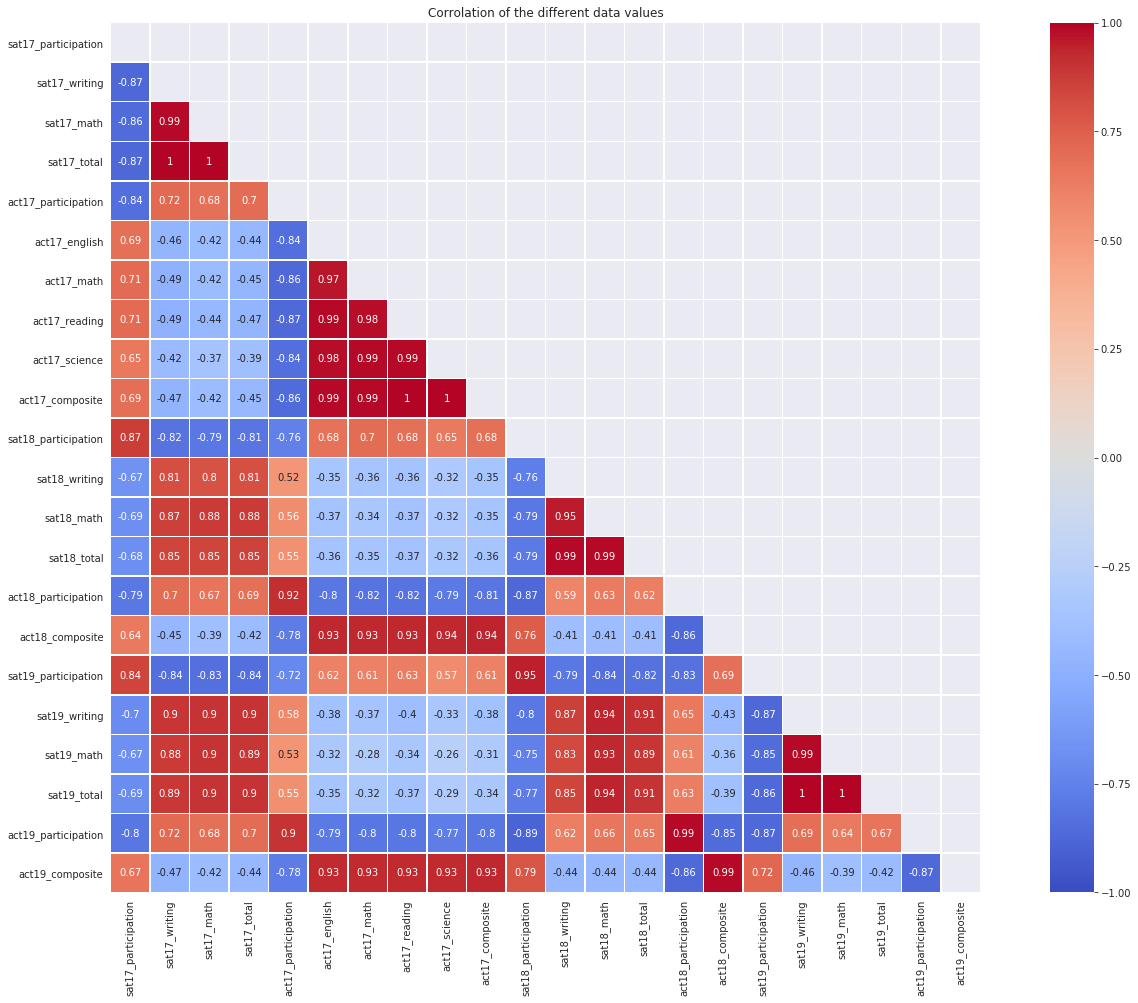

In [85]:
# from lesson 2.02b

# Heat map of the data

plt.figure(figsize = (25,16))


corr = final_data.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("dark"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='coolwarm')
    
plt.title('Corrolation of the different data values');

<span style="color:blue">
    
This shows some interesting correlations related to the participation rate and test scores.  
- higher participation equaled lower scores 
- higher participation in one test meant lower participation in the other

In [86]:
# Subplot Function for histograms
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,15)) 
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 


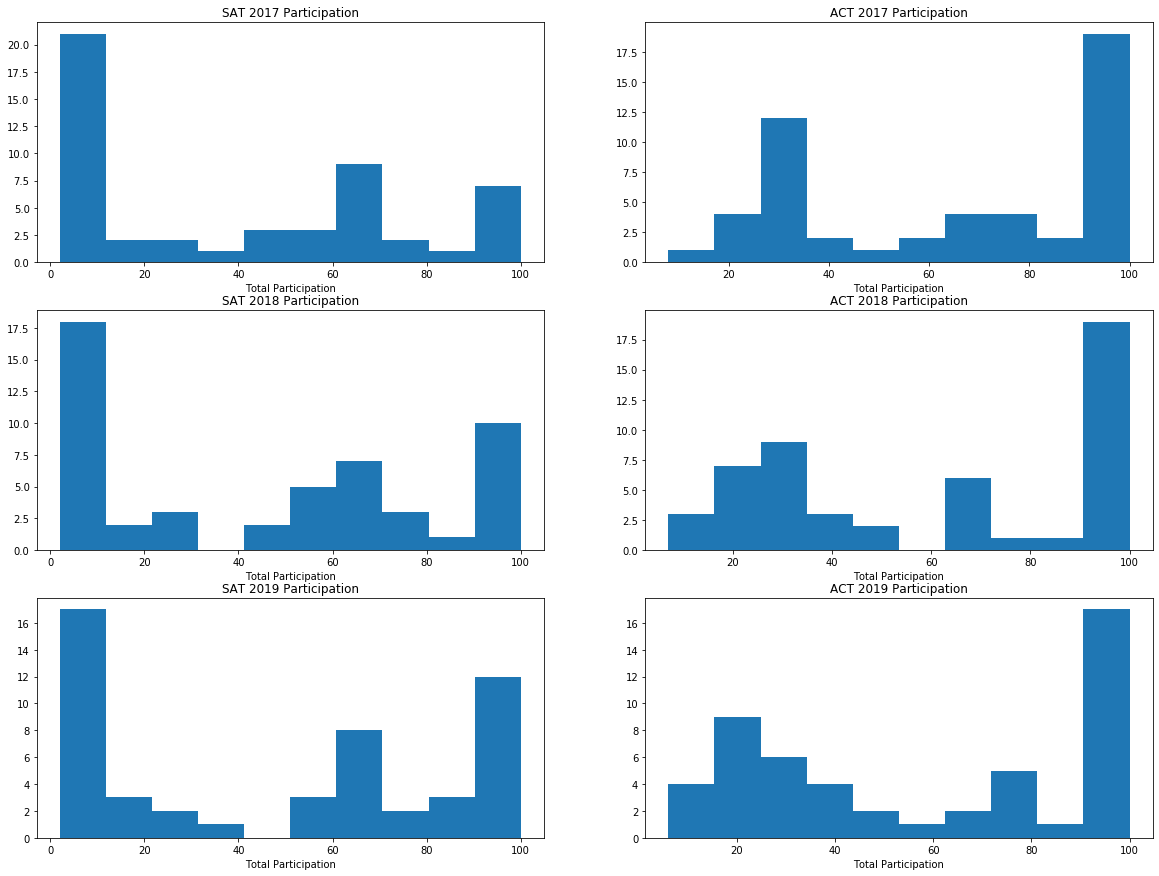

In [87]:
# calls the subplot function
list_columns = ['sat17_participation', 'act17_participation', 'sat18_participation', 'act18_participation', 'sat19_participation', 'act19_participation']
list_titles = ['SAT 2017 Participation', 'ACT 2017 Participation', 'SAT 2018 Participation', 'ACT 2018 Participation','SAT 2019 Participation','ACT 2019 Participation']
list_xlabels = ['Total Participation', 'Total Participation', 'Total Participation', 'Total Participation','Total Participation' ,'Total Participation']
subplot_histograms(final_data, list_columns, list_titles, list_xlabels)


<span style="color:blue">
    
Participation tends to be very skewed it is often very low or very high, not as many in the middle.

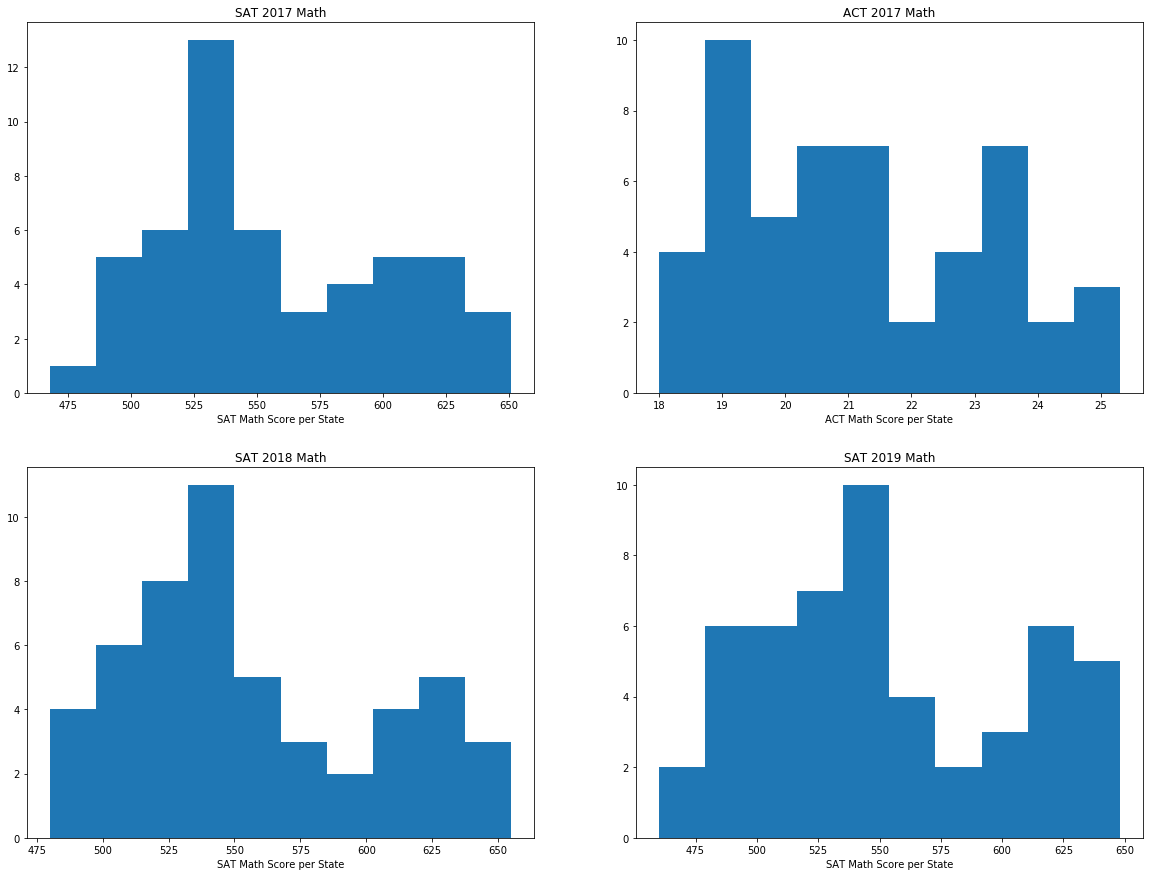

In [88]:
# calls the subplot function
list_columns_math = ['sat17_math', 'act17_math', 'sat18_math', 'sat19_math']
list_titles_math = ['SAT 2017 Math', 'ACT 2017 Math', 'SAT 2018 Math', 'SAT 2019 Math']
list_xlabels_math = ['SAT Math Score per State', 'ACT Math Score per State', 'SAT Math Score per State', 'SAT Math Score per State']
subplot_histograms(final_data, list_columns_math, list_titles_math, list_xlabels_math)



<span style="color:blue">
    
Both tests seem to follow a similar pattern with a large number around a lower value then a dip in scores and another group at the high value. 
    
    

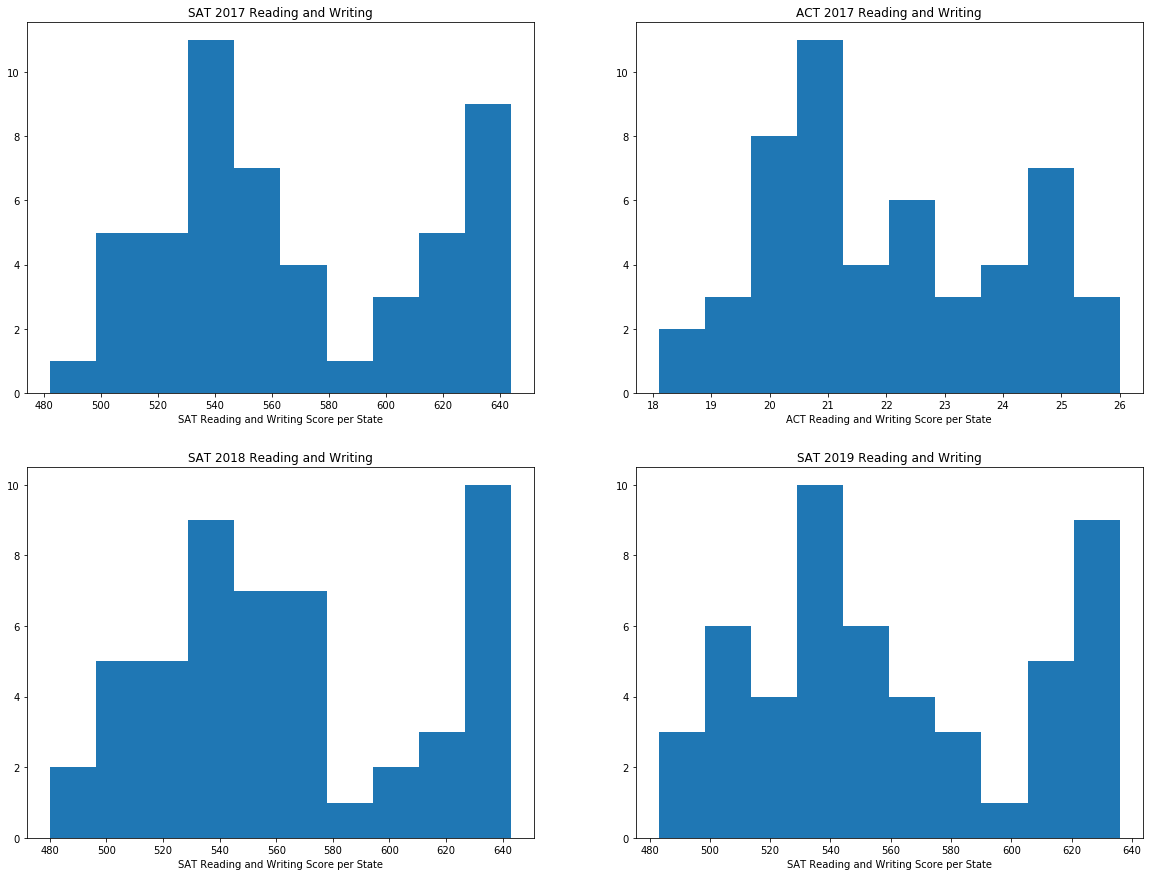

In [89]:
# calls the subplot function
list_columns_read = ['sat17_writing', 'act17_reading', 'sat18_writing', 'sat19_writing']
list_titles_read = ['SAT 2017 Reading and Writing', 'ACT 2017 Reading and Writing', 'SAT 2018 Reading and Writing', 'SAT 2019 Reading and Writing']
list_xlabels_read = ['SAT Reading and Writing Score per State', 'ACT Reading and Writing Score per State', 'SAT Reading and Writing Score per State', 'SAT Reading and Writing Score per State']
subplot_histograms(final_data, list_columns_read, list_titles_read, list_xlabels_read)

<span style="color:blue">
    
The Reading and writing scores seem to follow about the same trend as the math with a high value then a dip then another spike.

#### Plot and interpret scatter plots



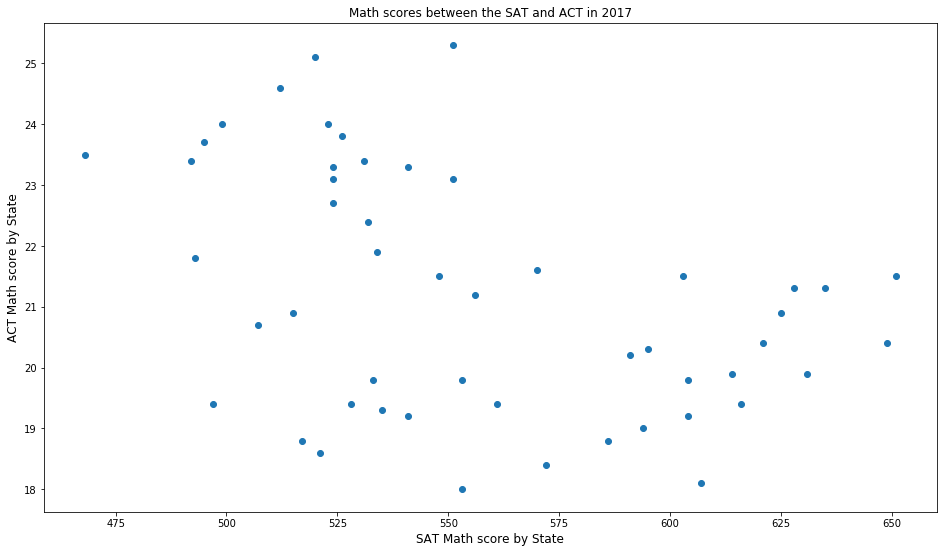

In [90]:
# from lesson 2.02b

plt.figure(figsize = (16, 9))
plt.scatter(final_data['sat17_math'],
           final_data['act17_math']
           )

plt.title("Math scores between the SAT and ACT in 2017")
plt.ylabel("ACT Math score by State", fontsize = 12)
plt.xlabel("SAT Math score by State", fontsize = 12);

<span style="color:blue">
    
Shows a rather loose negative correlation between the two tests

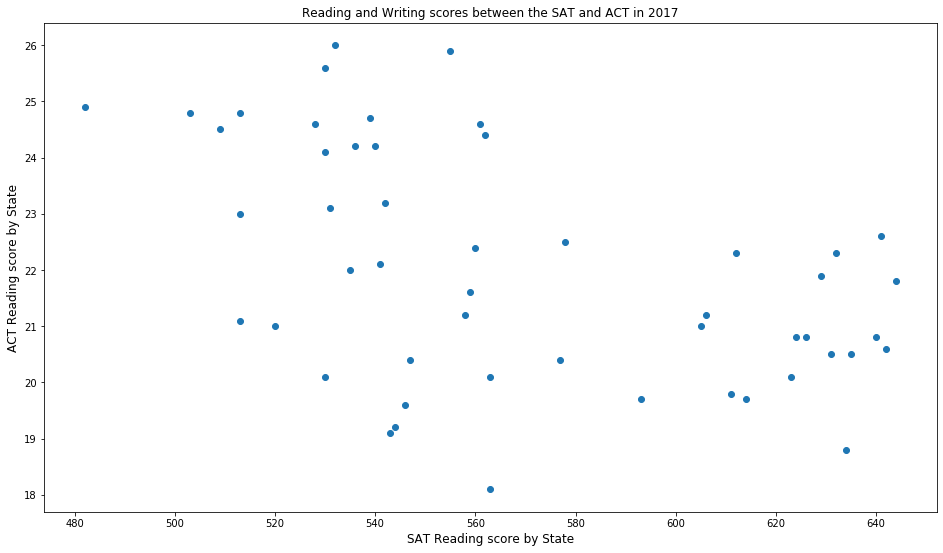

In [91]:
plt.figure(figsize = (16, 9))
plt.scatter(final_data['sat17_writing'],
           final_data['act17_reading']
           )

plt.title("Reading and Writing scores between the SAT and ACT in 2017")
plt.ylabel("ACT Reading score by State", fontsize = 12)
plt.xlabel("SAT Reading score by State", fontsize = 12);

<span style="color:blue">
    
About the same as math shows a rather loose negative correlation between the two tests

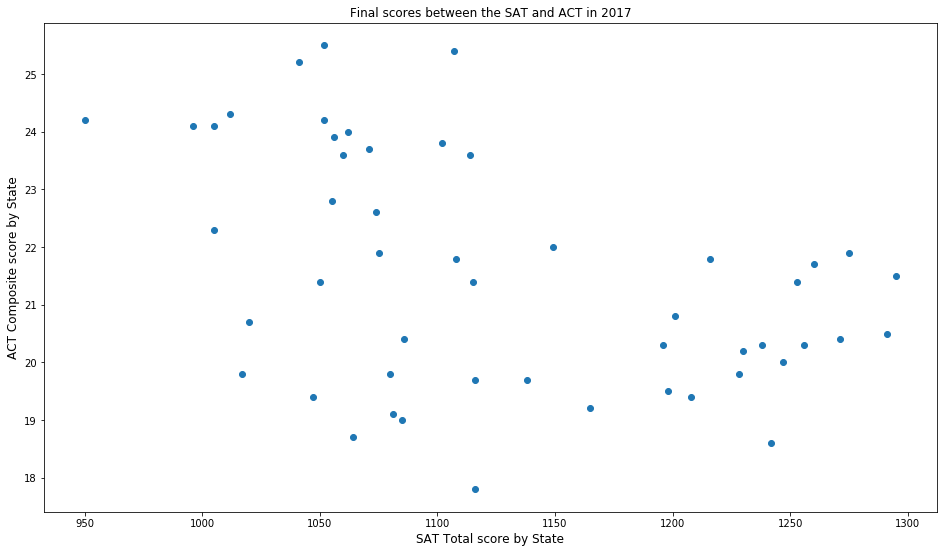

In [92]:
plt.figure(figsize = (16, 9))
plt.scatter(final_data['sat17_total'],
           final_data['act17_composite']
           )

plt.title("Final scores between the SAT and ACT in 2017")
plt.ylabel("ACT Composite score by State", fontsize = 12)
plt.xlabel("SAT Total score by State", fontsize = 12);

<span style="color:blue">
    
Again the same shows a rather loose negative correlation between the two tests

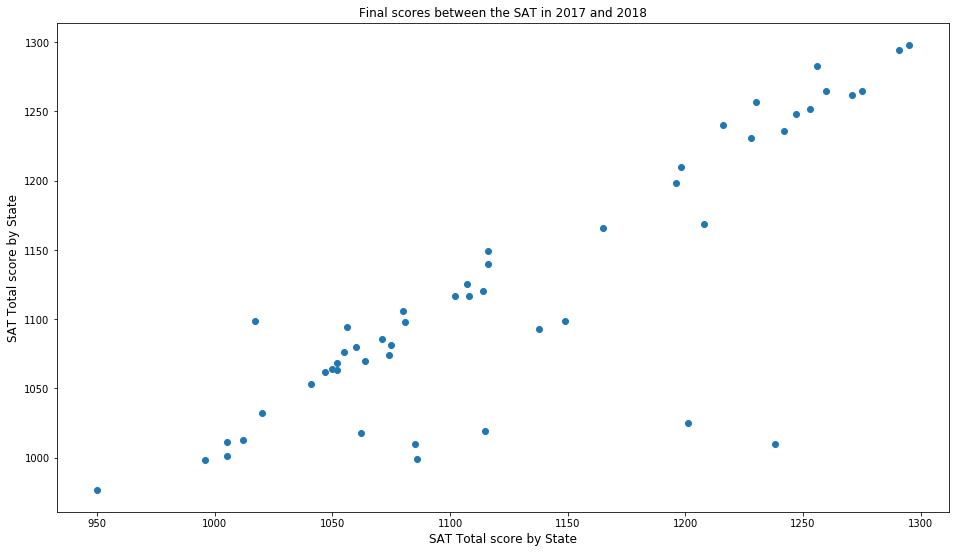

In [93]:
plt.figure(figsize = (16, 9))
plt.scatter(final_data['sat17_total'],
           final_data['sat18_total']
           )

plt.title("Final scores between the SAT in 2017 and 2018")
plt.ylabel("SAT Total score by State", fontsize = 12)
plt.xlabel("SAT Total score by State", fontsize = 12);

<span style="color:blue">
    
Close to a one positive correlation, what a stae did one year they did about the same next year.  The outliers might be those who changed their participation rate by a large amount between years.

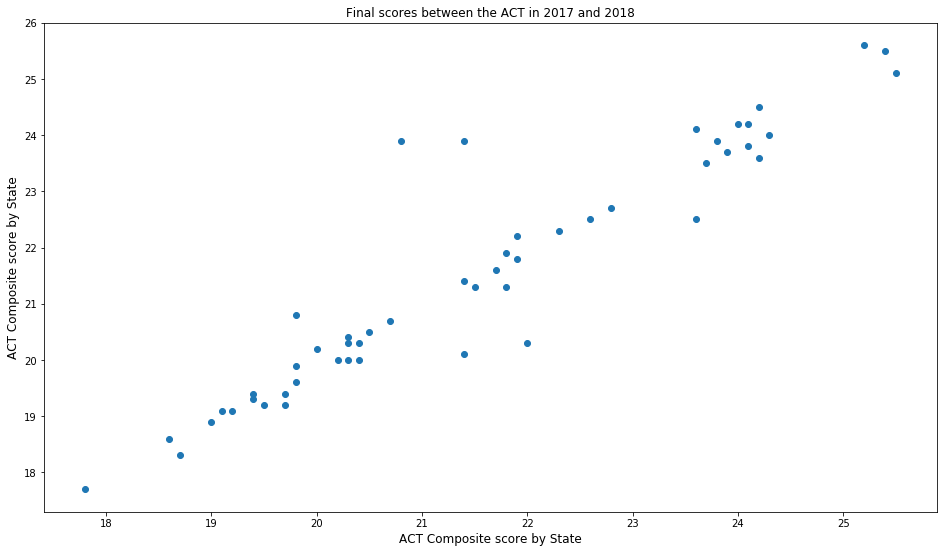

In [94]:
plt.figure(figsize = (16, 9))
plt.scatter(final_data['act17_composite'],
           final_data['act18_composite']
           )

plt.title("Final scores between the ACT in 2017 and 2018")
plt.ylabel("ACT Composite score by State", fontsize = 12)
plt.xlabel("ACT Composite score by State", fontsize = 12);

<span style="color:blue">
    
Similar to the SAT. Close to a one positive correlation, what a state did one year they did about the same next year.  


#### Plot and interpret boxplots



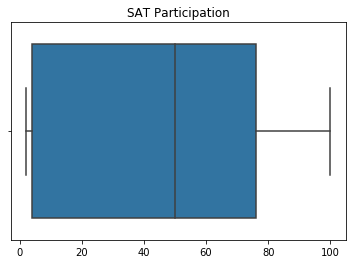

In [95]:
#from lesson 2.03

sns.boxplot([final_data['sat17_participation'], final_data['sat18_participation'], final_data['sat19_participation']])
plt.title('SAT Participation');

<span style="color:blue">
    
Sat participation shows no great outliers

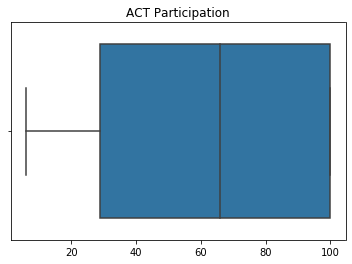

In [96]:
sns.boxplot([final_data['act17_participation'], final_data['act18_participation'], final_data['act19_participation']])
plt.title('ACT Participation');

<span style="color:blue">
    
ACT participation is greater overall than SAT

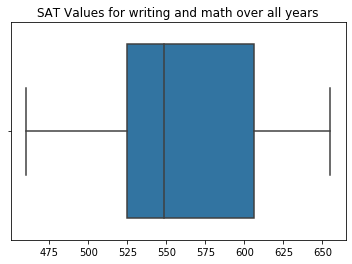

In [97]:
sns.boxplot([final_data['sat17_math'],
                         final_data['sat17_writing'],
                         final_data['sat18_math'], 
                         final_data['sat18_writing'],
                         final_data['sat19_math'],
                         final_data['sat19_writing']]);

plt.title('SAT Values for writing and math over all years');

<span style="color:blue">
    
SAT values for math and writing stay in a confined range even over the years with no major outliers.

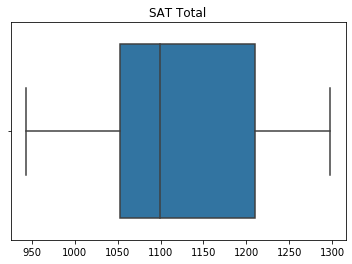

In [98]:
sns.boxplot([final_data['sat17_total'], final_data['sat18_total'], final_data['sat19_total']])
plt.title('SAT Total');

<span style="color:blue">
    
Similar to the individual values the total value does not show any great outliers.

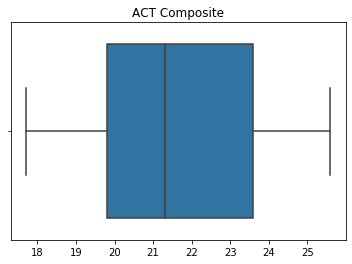

In [99]:
sns.boxplot([final_data['act17_composite'], final_data['act18_composite'], final_data['act19_composite']])
plt.title('ACT Composite');

<span style="color:blue">

ACT composite data has no obvious outliers and stays in an acceptable range with known possible values.

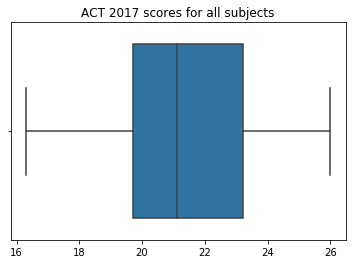

In [100]:
sns.boxplot([final_data['act17_math'],
             final_data['act17_science'],
             final_data['act17_reading'],
            final_data['act17_english']])
plt.title('ACT 2017 scores for all subjects');

<span style="color:blue">
    
ACT individual scores are like the composite score with no obvious outliers

#### Additional Plots


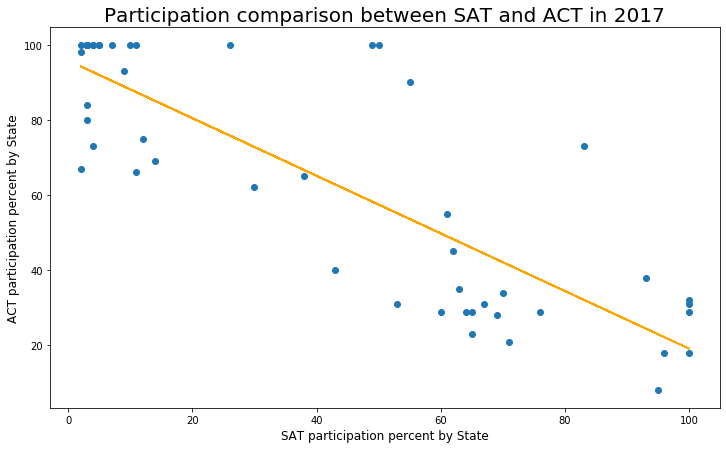

In [220]:
# code from https://kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python

plt.figure(figsize = (12, 7))
plt.scatter(final_data['sat17_participation'],
           final_data['act17_participation']
           )

m, b = np.polyfit(final_data['sat17_participation'], final_data['act17_participation'], 1)

plt.plot(final_data['sat17_participation'], m*final_data['sat17_participation'] + b, color='orange')

plt.title("Participation comparison between SAT and ACT in 2017", fontsize = 20)
plt.ylabel("ACT participation percent by State", fontsize = 12)
plt.xlabel("SAT participation percent by State", fontsize = 12);
plt.savefig('./../images/par_par17.png')

<span style="color:blue">

Negative correlation between test participation shown with a line

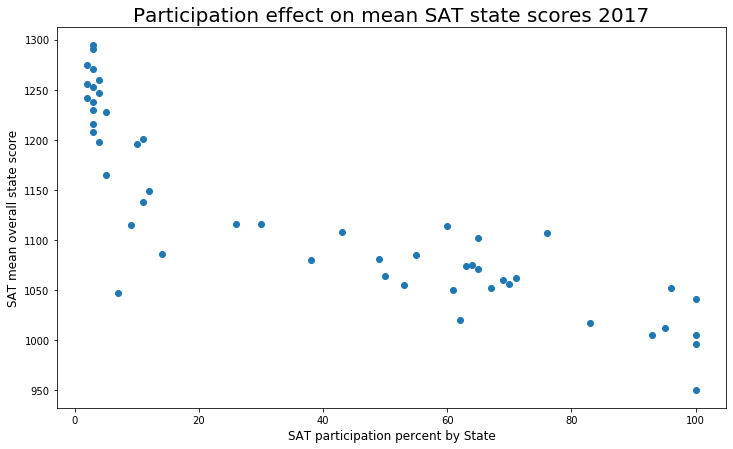

In [216]:
plt.figure(figsize = (12, 7))
plt.scatter(final_data['sat17_participation'],
           final_data['sat17_total']
           )



plt.title("Participation effect on mean SAT state scores 2017", fontsize = 20)
plt.ylabel("SAT mean overall state score", fontsize = 12)
plt.xlabel("SAT participation percent by State", fontsize = 12);
plt.savefig('./../images/par_score17.png')

<span style="color:blue">

A plot to show how incresed SAT participation reduces SAT total scores.

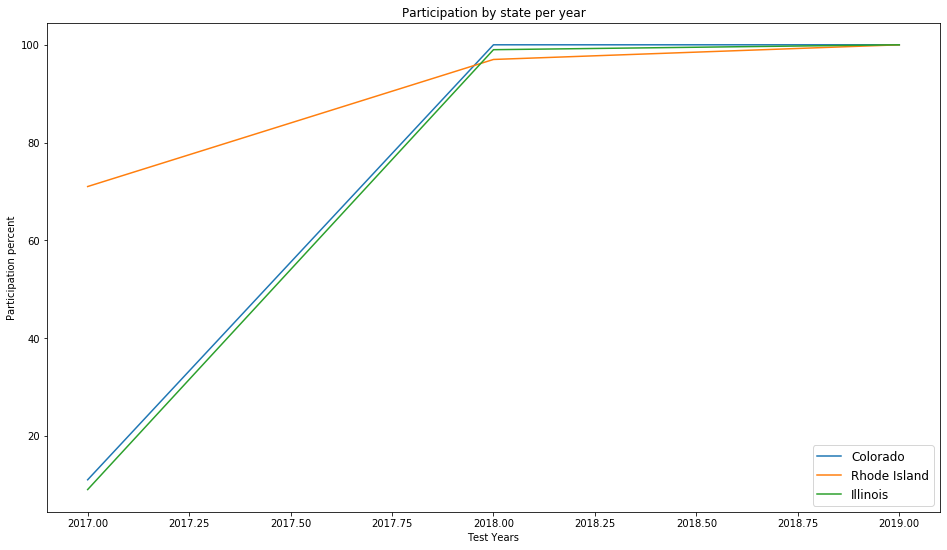

In [178]:
# from lesson 2.02b

plt.figure(figsize = (16, 9))


plt.plot([2017, 2018, 2019],
         final_data.loc[final_data['state'] == 'Colorado',['sat17_participation', 'sat18_participation', 'sat19_participation']].T, # x axis
         label = 'Colorado'
        )

plt.plot([2017, 2018, 2019],
         final_data.loc[final_data['state'] == 'Rhode Island',['sat17_participation', 'sat18_participation', 'sat19_participation']].T, # x axis
         label = 'Rhode Island'
        )

plt.plot([2017, 2018, 2019],
         final_data.loc[final_data['state'] == 'Illinois',['sat17_participation', 'sat18_participation', 'sat19_participation']].T, # x axis
         label = 'Illinois'
        )

plt.title('Participation by state per year')
plt.ylabel('Participation percent')
plt.xlabel('Test Years')
plt.legend(loc = 'lower right', fontsize = 'large');

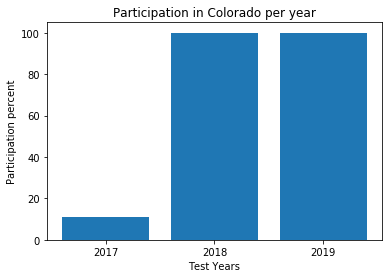

In [205]:
plt.bar([2017, 2018, 2019],
         [int(final_data[final_data['state'] == 'Colorado']['sat17_participation']),int(final_data[final_data['state'] == 'Colorado']['sat18_participation']),int(final_data[final_data['state'] == 'Colorado']['sat19_participation'])], 
         );

plt.title('Participation in Colorado per year')
plt.ylabel('Participation percent')
plt.xticks((2017,2018,2019))
plt.xlabel('Test Years');
plt.savefig('./../images/par_CO.png')

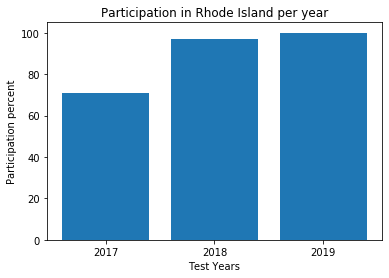

In [206]:
plt.bar([2017, 2018, 2019],
         [int(final_data[final_data['state'] == 'Rhode Island']['sat17_participation']),int(final_data[final_data['state'] == 'Rhode Island']['sat18_participation']),int(final_data[final_data['state'] == 'Rhode Island']['sat19_participation'])], 
         );

plt.title('Participation in Rhode Island per year')
plt.ylabel('Participation percent')
plt.xticks((2017,2018,2019))
plt.xlabel('Test Years');
plt.savefig('./../images/par_RI.png')

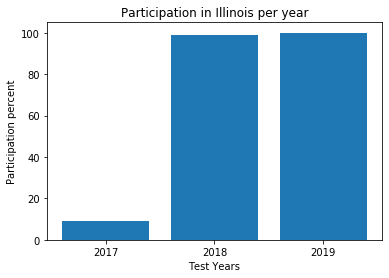

In [207]:
plt.bar([2017, 2018, 2019],
         [int(final_data[final_data['state'] == 'Illinois']['sat17_participation']),int(final_data[final_data['state'] == 'Illinois']['sat18_participation']),int(final_data[final_data['state'] == 'Illinois']['sat19_participation'])], 
         );

plt.title('Participation in Illinois per year')
plt.ylabel('Participation percent')
plt.xticks((2017,2018,2019))
plt.xlabel('Test Years');
plt.savefig('./../images/par_IL.png')

<span style="color:blue">
    
    
Ploting the Participation in certain cities based on the year observed to show the change in the 3 main cities.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

<span style="color:blue">
    
Did not get around to this.

## Outside Research

<span style="color:blue">

https://co.chalkbeat.org/2015/12/23/21092477/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers

Talks about Colorado switching because the SAT aligns with Common Core and how they are using the SAT in place of a general assessment test in this case the PARCC.
    
https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores#:~:text=PROVIDENCE%2C%20R.I.%20%E2%80%94%20Ninety%2Dfive,take%20the%20college%20admission%20test.
    
Talks about Rhode Island moving to a mandatory SAT to replace the state assesment which was the PARCC.
    
https://www.govtech.com/education/k-12/Illinois-Pulls-Out-of-PARCC-Test.html
    
Illinois replaces the PARCC with the SAT

https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf

Discusses ways to increase participation in the test both by direct and indirect means

https://blog.prepscholar.com/which-states-require-the-sat

lists states that require the SAT as a reference

https://www.testive.com/state-sat-act/

Talks about testing as a replacement for assement tests and which place requires which test

https://magoosh.com/hs/sat/sat-scores/2018/average-sat-scores-by-state-how-does-your-state-stack-up/

discusses average SAT scores and what they mean to a state


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

<span style="color:blue">

Three states had points of interest to my investigation of the data. Colorado, Rhode Island and Illinois all had low participation in 2017 but near 100% for 2018 and 2019.  The reasons for this seem to involve a change from an already state mandated test, so the funding for State testing was already in place, and changing the way that school assessment testing is done in the state.
    
The SAT is able to offer solutions to these problem for the state by partnering with a state and giving them a way to do assessment testing using the SAT as a replacement for other tests. This also gives students a test that they can use for college admissions and state colleges a way to judge the progress of students across the whole state. That way colleges can tailor admissions to pull in more in state students and raise admissions.

Louisiana could be a good state to target for future SAT expansion.  They have a mandated ACT so the funding is already there.  They use a modified PARCC which other states walked away from and replaced with the SAT.  They are a Common Core state and the new SAT that uses a Common Core background will fit in with their state standards.

## What Next

<span style="color:blue">

Things I would like to look into as the project continues:
- Which states have problems with their current assessment tests and could be moved to change?
- Some colleges are droping ACT and SAT requirements, how will this effect state view on testing?
- Other factors that might incentivize states to offer SAT programs like low income areas or low college participation.
- How much does offering college prep options help a student to decide to take the test.


## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [101]:
# Code: